In [1]:
import tensorflow as tf

In [2]:
# Load the data
mnist = tf.keras.datasets.mnist

# Creating the train, test set
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Normalising the data
x_train = x_train/255.0
x_test = x_test/255.0

# Printing the shape of x_train
print(x_train.shape)


(60000, 28, 28)


In [3]:
# Build the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten


model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(128,activation='relu'),
                    Dropout(0.2),
                    Dense(10,activation='softmax')])

# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Fitting the model 
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.9135 - val_loss: 0.1470 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9575 - val_loss: 0.0997 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9668 - val_loss: 0.0815 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.0789 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9768 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9788 - val_loss: 0.0689 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9807 - val_loss: 0.0654 - val_accuracy:

In [4]:
# Creating a data frame with loss, accuracy, val_loss, val_accuracy 
import pandas as pd
import numpy as np
hist = pd.DataFrame(model.history.history)
hist['epochs'] = range(1,11)
hist.head()

,loss,accuracy,val_loss,val_accuracy,epochs
0,0.300309,0.913533,0.146985,0.9544,1
1,0.142349,0.957533,0.099717,0.9704,2
2,0.107602,0.966800,0.081544,0.9749,3
3,0.088123,0.972533,0.078895,0.9750,4
4,0.073966,0.976783,0.075482,0.9779,5


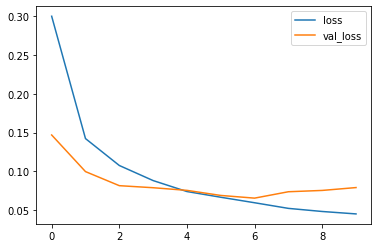

In [5]:
import matplotlib.pyplot as plt
# Plotiing the Loss
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

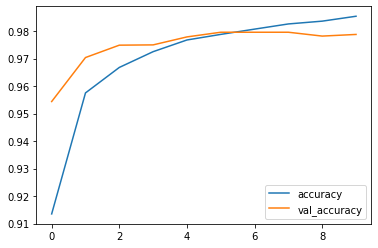

In [6]:
# Plotting the accuracy
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()

In [7]:
# Evaluating the model
model.evaluate(x_train,y_train)# training loss = 0.0180, training accuracy = 0.9945

model.evaluate(x_test,y_test)# test loss = 0.0722, test accuracy = 0.9791

313/313 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9788


[0.07909127324819565, 0.9787999987602234]

In [8]:
# Predicting the model
p_test = model.predict(x_test).argmax(axis=1)

Text(0.5, 1.0, 'True label: 9 Predicted: 4')

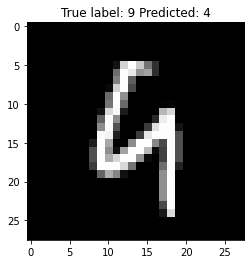

In [9]:
# Checking the prediction and the true value doesn't match
missclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_img)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))

Text(0.5, 1.0, 'True label: 7 Predicted: 7')

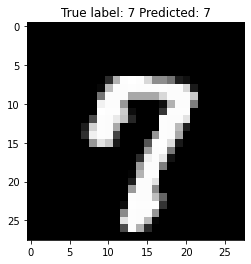

In [10]:
# Checking the images which are equal to the prediction
same_img = np.where(p_test == y_test)[0]
j = np.random.choice(same_img)
plt.imshow(x_test[j], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[j], p_test[j]))

Confusion matrix, without normalization
[[ 971    0    2    0    0    1    0    3    3    0]
 [   0 1115    6    4    0    0    3    2    5    0]
 [   7    0 1011    1    2    0    1    6    4    0]
 [   0    0    4  996    0    1    0    6    3    0]
 [   0    0    9    0  952    0    2    3    0   16]
 [   2    0    0   13    1  864    4    2    4    2]
 [   7    2    0    1    4    4  938    0    2    0]
 [   2    2   10    1    0    0    0 1008    1    4]
 [   1    0    7    4    2    2    0    9  946    3]
 [   1    3    1    4    4    2    0    6    1  987]]


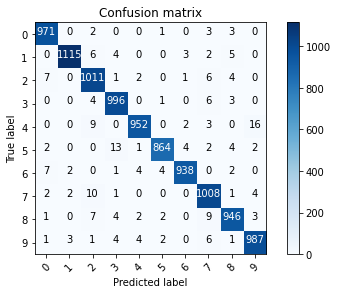

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 